In [35]:
!pip3 freeze > requirements.txt

# Importing libraries



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Data reading and preprocessing


In [4]:
data = pd.read_csv("owid-covid-data.csv")
data["date"] = pd.to_datetime(data["date"])
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [5]:
data = data[['location',"date","total_cases","total_deaths",'total_tests','population_density','median_age','hospital_beds_per_thousand','life_expectancy','handwashing_facilities']]
data.head()

,location,date,total_cases,total_deaths,total_tests,population_density,median_age,hospital_beds_per_thousand,life_expectancy,handwashing_facilities
0,Afghanistan,2019-12-31,0.0,0.0,NaN,54.422,18.6,0.5,64.83,37.746
1,Afghanistan,2020-01-01,0.0,0.0,NaN,54.422,18.6,0.5,64.83,37.746
2,Afghanistan,2020-01-02,0.0,0.0,NaN,54.422,18.6,0.5,64.83,37.746
3,Afghanistan,2020-01-03,0.0,0.0,NaN,54.422,18.6,0.5,64.83,37.746
4,Afghanistan,2020-01-04,0.0,0.0,NaN,54.422,18.6,0.5,64.83,37.746


In [6]:
print("% null values in data column wise")
data.isna().sum()/data.shape[0]*100

% null values in data column wise


location                       0.000000
date                           0.000000
total_cases                    1.069052
total_deaths                   1.069052
total_tests                   67.937483
population_density             4.505074
median_age                     9.994881
hospital_beds_per_thousand    18.125696
life_expectancy                1.394284
handwashing_facilities        58.827958
dtype: float64

In [7]:
data = data.drop(columns=["total_tests","handwashing_facilities"],axis=1)

In [8]:
data.groupby(by=["location"]).mean()

,total_cases,total_deaths,population_density,median_age,hospital_beds_per_thousand,life_expectancy
location,,,,,,
Afghanistan,9.639144e+03,244.990050,54.422,18.6,0.500,64.83
Albania,1.385028e+03,40.225352,104.871,38.0,2.890,78.57
Algeria,5.724107e+03,378.300971,17.348,29.1,1.900,76.88
Andorra,6.893796e+02,39.569343,163.755,NaN,NaN,83.73
Angola,1.727519e+02,8.186047,23.890,16.8,NaN,61.15
...,...,...,...,...,...,...
Western Sahara,2.073191e+02,0.638298,NaN,28.4,NaN,70.26
World,3.911051e+06,204970.175355,58.045,30.9,2.705,72.58
Yemen,6.103000e+02,160.900000,53.508,20.3,0.700,66.12


In [9]:
data.describe()

,total_cases,total_deaths,population_density,median_age,hospital_beds_per_thousand,life_expectancy
count,3.285200e+04,32852.000000,31711.000000,29888.000000,27188.000000,32744.000000
mean,5.022757e+04,2632.043742,368.823430,31.641485,3.147806,74.249280
std,5.106306e+05,25029.235976,1681.127189,9.012004,2.549893,7.315021
min,0.000000e+00,0.000000,0.137000,15.100000,0.100000,53.280000
25%,2.100000e+01,0.000000,39.497000,24.400000,1.380000,70.390000
50%,4.410000e+02,9.000000,90.672000,31.800000,2.540000,75.860000
75%,4.994250e+03,107.000000,222.873000,39.800000,4.210000,80.100000
max,1.646571e+07,653862.000000,19347.500000,48.200000,13.800000,86.750000


In [10]:
data = data.dropna()

In [11]:
data.isna().sum()

location                      0
date                          0
total_cases                   0
total_deaths                  0
population_density            0
median_age                    0
hospital_beds_per_thousand    0
life_expectancy               0
dtype: int64

In [12]:
world = data[data.location == "World"].index.values
inter = data[data.location=="International"].index.values
indexes = np.concatenate( [world,inter] )
data = data.drop(indexes)

In [13]:
data.shape

(25727, 8)

In [14]:
data.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chile',
       'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana',
       'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica'

# Basic Visualization

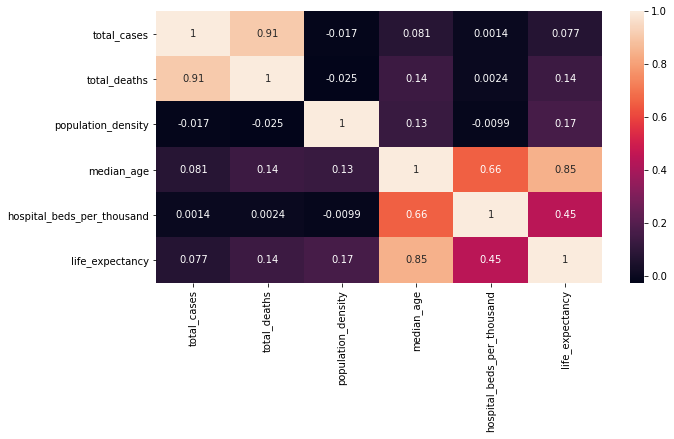

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

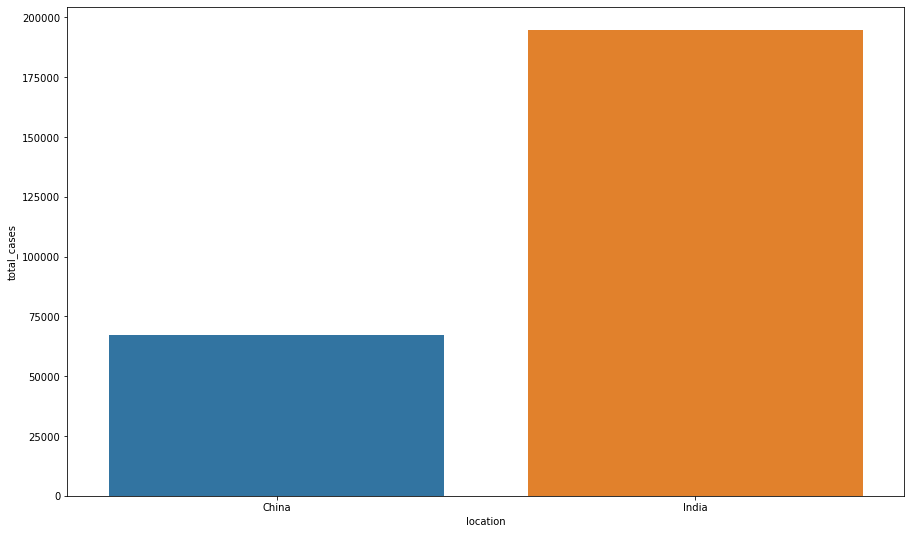

In [16]:
data1 = data[(data["location"] == "India") | (data["location"]=="China")]
plt.figure(figsize=(15,9))
sns.barplot(x='location',y='total_cases',data = data1,ci=0)
plt.show()

# Random Forest Regressor Model



In [17]:
random_forest_data = data.copy()
random_forest_data["date"] = random_forest_data["date"].map(dt.datetime.toordinal)
random_forest_data.head()

,location,date,total_cases,total_deaths,population_density,median_age,hospital_beds_per_thousand,life_expectancy
0,Afghanistan,737424,0.0,0.0,54.422,18.6,0.5,64.83
1,Afghanistan,737425,0.0,0.0,54.422,18.6,0.5,64.83
2,Afghanistan,737426,0.0,0.0,54.422,18.6,0.5,64.83
3,Afghanistan,737427,0.0,0.0,54.422,18.6,0.5,64.83
4,Afghanistan,737428,0.0,0.0,54.422,18.6,0.5,64.83


In [18]:
def convert_country_to_val(data):
  countries = ['Afghanistan', 'Albania', 'Algeria', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chile',
       'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana',
       'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg',
       'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta',
       'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Oman', 'Pakistan',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russia', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Sao Tome and Principe',
       'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia',
       'Slovenia', 'Somalia', 'South Africa', 'South Korea', 'Spain',
       'Sri Lanka', 'Sudan', 'Suriname', 'Swaziland', 'Sweden',
       'Switzerland', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor',
       'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'Yemen', 'Zambia', 'Zimbabwe']
  data.location = data.location.apply(lambda x:countries.index(x))
  return data.location

In [19]:
random_forest_data.location = convert_country_to_val(random_forest_data)
random_forest_data.head()

,location,date,total_cases,total_deaths,population_density,median_age,hospital_beds_per_thousand,life_expectancy
0,0,737424,0.0,0.0,54.422,18.6,0.5,64.83
1,0,737425,0.0,0.0,54.422,18.6,0.5,64.83
2,0,737426,0.0,0.0,54.422,18.6,0.5,64.83
3,0,737427,0.0,0.0,54.422,18.6,0.5,64.83
4,0,737428,0.0,0.0,54.422,18.6,0.5,64.83


In [20]:
#x = loc,date,pop density,age,beds,life
#y = cases,deaths
# we dropped values and the index is not a continuous range hence we need to reset indexes
random_forest_data = random_forest_data.reset_index()
x = random_forest_data.iloc[:,[0,1,4,5,6,7]].values
y = random_forest_data.iloc[:,[2,3]].values

In [21]:
from sklearn.preprocessing import StandardScaler

scale_x = StandardScaler()
x = scale_x.fit_transform(x)
scale_y = StandardScaler()
y = scale_y.fit_transform(y)

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [23]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=150)
RFR.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150)

In [24]:
def compare():
  to_check = random_forest_data.loc[random_forest_data["location"] == 0,].sort_values(by="date").values
  to_check[-1,:]
  tx = to_check[-1,[0,1,4,5,6,7]].reshape(1,-1)
  ty = to_check[-1,[2,3]].reshape(1,-1)
  forest = scale_y.inverse_transform(RFR.predict(scale_x.transform(tx)))
  print("Original values = {}\nRandom Forest = {}".format(ty,forest))

In [25]:
y_pred_RFR = RFR.predict(x_test)
print("Accuracy for RFR = {}".format(RFR.score(x_test,y_test)))
compare()

Accuracy for RFR = 0.9990336590125829
Original values = [[737634.  36368.]]
Random Forest = [[737631.84666667  36113.02666667]]


In [26]:
to_verify = pd.DataFrame({"location":["India"],"date":[dt.datetime.toordinal(pd.to_datetime("2020-07-29"))],"population_density":[450.419],"median_age":[28.2],	"hospital_beds_per_thousand":[0.53],	"life_expectancy":[69.66]})
to_verify.location = convert_country_to_val(to_verify)
scaled = scale_x.transform(to_verify.values)
print(scale_y.inverse_transform(RFR.predict(scaled)))

[[737581.96666667  13285.41333333]]


In [27]:
to_verify = pd.DataFrame({"location":["India"],"date":[dt.datetime.toordinal(pd.to_datetime("2020-08-1"))],"population_density":[450.419],"median_age":[28.2],	"hospital_beds_per_thousand":[0.53],	"life_expectancy":[69.66]})
to_verify.location = convert_country_to_val(to_verify)
scaled = scale_x.transform(to_verify.values)
print(scale_y.inverse_transform(RFR.predict(scaled)))

[[737581.96666667  13285.41333333]]


# ARIMA model



In [28]:
arima_data = data.copy()

In [29]:
def train_test_split_(series):
  ''' splits the data sequentially to 75 : 25 ratio for train : test'''
  train = series[: int(len(series) * 0.75)]
  test = series[int(len(series) * 0.75) :]
  return train, test


In [30]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import warnings
from sklearn.metrics import mean_squared_error
import numpy as np
warnings.filterwarnings('ignore')


def model(train, test): # ret hyperp-parameters and performance using rmse. Used this to compare arima's performance with other models
        ''' Takes train and test
        Generates model trained on train data and provides prediction for test data.
        return model, rmse, order and predictions for test data with plot'''
        arima_order = auto_arima(train, seasonal= False, information_criterion= 'aic')
        order = arima_order.order #returns p d q terms
        seasonal_order = arima_order.seasonal_order # ret arima_order + P D Q m
        
       
        arima_model = ARIMA(train, order = order)
        arima_model = arima_model.fit()
        start = len(train)
        end = len(train) + len(test) - 1
        arima_pred = arima_model.predict(start, end, dynamic = False, typ = 'levels')
        rmse_arima = np.sqrt(mean_squared_error(test, arima_pred))   

        return arima_model, rmse_arima, arima_order,arima_pred
        

In [31]:
def arima_forecast(train, forecast_range, order):
        ''' Takes train data, forecast range to provide predictions and order containing hyperparameters.
        model is trained on entire dataset for that location.
        Returns predictions'''
        arima_order = auto_arima(train, seasonal= False, information_criterion= 'aic')
        order = arima_order.order #returns p d q terms
        
        arima_model = ARIMA(train, order = order)
        arima_model = arima_model.fit()
        start = len(train)
        end = start + forecast_range - 1
        arima_pred = arima_model.predict(start, end, dynamic = False, typ = 'levels')
        return arima_pred

In [32]:
def process(location,forecast_range):
  ''' Takes user location choice and forecast range for predictions'''

  user_location = arima_data.loc[arima_data.location==location,:]
  user_location = user_location.sort_values(by = ['date'])
  user_location = user_location.set_index('date')
  # data for a location has same name and other fields are redundant hence we need to remove them
  user_location = user_location.drop(columns=['location', 'population_density',
        'median_age', 'hospital_beds_per_thousand', 'life_expectancy'])
  # filter dataset having non zero values
  user_location = user_location.loc[(user_location["total_cases"] > 0) & (user_location["total_deaths"] > 0)]

  # separate case and deaths fields
  user_cases = user_location['total_cases']
  user_deaths = user_location['total_deaths']

  # make deaths and cases train and test data
  train_deaths, test_deaths = train_test_split_(user_location['total_deaths'])
  train_cases, test_cases = train_test_split_(user_location['total_cases'])

  # model building 
  model_deaths, rmse_deaths, order_deaths, partial_pred_deaths = model(train_deaths, test_deaths)
  model_cases, rmse_cases, order_cases, partial_pred_cases = model(train_cases, test_cases)

  # plotting to check the testing values and predicted values
  plt.plot(train_deaths,label="deaths training set")
  plt.plot(partial_pred_deaths,label = "predicted deaths testing set")
  plt.plot(test_deaths,label="actual deaths testing set")
  plt.xlabel("Dates")
  plt.ylabel("Total deaths")
  plt.title("Plot for deaths with actual testing and predicted data for comparison")
  plt.legend()
  plt.show()

  # forecast deaths and cases values for specific location
  pred_deaths = arima_forecast(user_deaths, forecast_range, order_deaths.order)
  pred_cases = arima_forecast(user_cases, forecast_range, order_cases.order)

  # return predicted and original values
  return pred_deaths,pred_cases,user_deaths,user_cases

def plot_forecast(pred,forecast_range,show_graphs = False):
  '''Takes location i.e predm forecast range and bool varibale to show additional graphs'''
  pred_deaths,pred_cases,user_deaths,user_cases = process(pred,forecast_range)

  if show_graphs == True:
    plt.plot(user_cases,label="Actual cases")
    plt.plot(pred_cases,label="Predicted cases")
    plt.xlabel("Dates")
    plt.ylabel("Total cases")
    plt.title("Date vs Total cases for {} days forecast".format(forecast_range))
    plt.legend()
    plt.show()

    plt.plot(user_deaths,label="Actual deaths")
    plt.plot(pred_deaths,label="Predicted deaths")
    plt.xlabel("Dates")
    plt.ylabel("Total deaths")
    plt.title("Date vs Total deaths for {} days forecast".format(forecast_range))
    plt.legend()
    plt.show()

  return pred_deaths,pred_cases

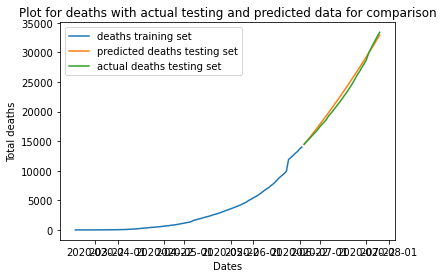

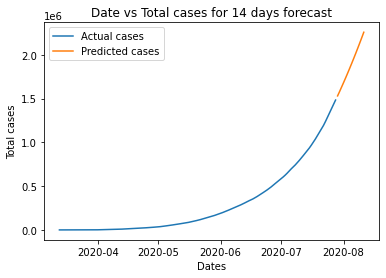

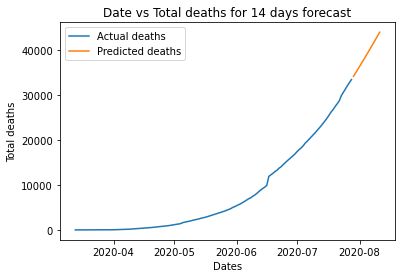

In [33]:
pred_deaths,pred_cases = plot_forecast("India",14,True)